In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import json
import sys, os

this_path = '/home/ibi/Documents/GitHub/ady201m-project'
sys.path.append(this_path)
os.chdir(this_path)

In [2]:
df = pd.read_csv('data/processed/train-data-cleaned.csv')
df.head()

,Name,Automaker,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(kmpl),Engine (CC),Power (bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


In [3]:
categorical_cols = ['Automaker', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
label_encoders = {col: LabelEncoder() for col in categorical_cols}
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

scaler = StandardScaler()
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage(kmpl)', 'Engine (CC)', 'Power (bhp)', 'Seats', 'Price']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

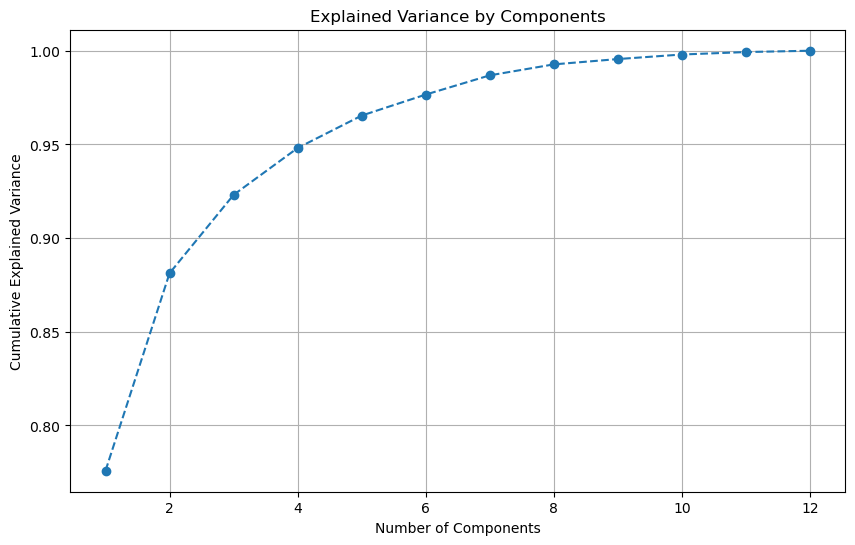

In [4]:
pca = PCA()
pca_data = pca.fit_transform(df[numerical_cols + categorical_cols])

plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
